In [2]:
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np

In [3]:
mnist_train = datasets.MNIST(
    root='data',
    train=True,
    download=True,
)

mnist_test = datasets.MNIST(
    root='data',
    train=False,
    download=True,
)



/home/erd/.local/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
test_data = mnist_test.data.numpy()
train_data = mnist_train.data.numpy()
test_data.shape

(10000, 28, 28)

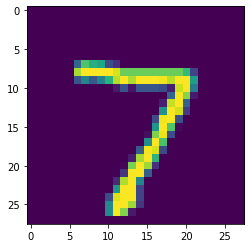

In [5]:
plt.imshow(test_data[0])

In [89]:
def color(data):
    """
    Color the MNIST data.
    """
    std = np.std(data)
    index = data < std
    foreground_color = np.random.rand(3)
    background_color = np.random.randint(0,255, size=3)
    r_channel = np.rint(foreground_color[0] * data)
    g_channel = np.rint(foreground_color[1] * data)
    b_channel = np.rint(foreground_color[2] * data)
    r_channel[index] = background_color[0]
    g_channel[index] = background_color[1]
    b_channel[index] = background_color[2]
    r_channel = r_channel.astype(np.uint8)
    g_channel = g_channel.astype(np.uint8)
    b_channel = b_channel.astype(np.uint8)
    return np.stack([ r_channel, g_channel, b_channel ], axis=-1)


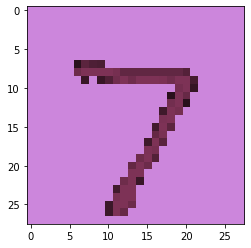

In [92]:
# print(f'min {np.min(cdata)} max {np.max(cdata)}')
ctestdata = color(test_data)
ctraindata = color(train_data)
plt.imshow(ctestdata[0])

In [97]:
with open('data/colored_MNIST/numpy_test_data.npz', 'wb') as f:
    np.savez_compressed(f, ctestdata)
with open('data/colored_MNIST/numpy_train_data.npz', 'wb') as f:
    np.savez_compressed(f, ctraindata)

In [96]:
with open('data/colored_MNIST/numpy_test_label.npz', 'wb') as f:
    np.savez_compressed(f, mnist_test.targets.numpy())
with open('data/colored_MNIST/numpy_train_label.npz', 'wb') as f:
    np.savez_compressed(f, mnist_test.targets.numpy())